<a href="https://www.kaggle.com/code/pttljessy/eda-godaddy-detecting-and-removing-outliers?scriptVersionId=148384487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Table of Contents**
**Step 1: Import necessary libraries and packages**

**Step 2: Cleaning data**

**Step 3: EDA**

**Plot the distribution plots for the microbusiness_density**

**Detecting and Removing outliers using IQR-based technique**

**Asking analytical questions and visualisations**


Examples:
* Are there differences in microbusiness density across states? Show the statistics 
* Which states has the most standard deviation? Which states has the least standard deviation? How does the transition since August 2019 to now look like?
* Is it similar within the same state?

**Step 5: Insights summary and conclusion**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/revealed_test.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


# Step 1: Import necessary libraries and packages

In [2]:
#Importing necessary libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# returns current date and time
now = datetime.now()

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.linear_model import LinearRegression
from scipy import stats

# **Step 2: Clean data**

In [3]:
#load
train_df=pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')

#check for null columns
cols_with_missing = [col for col in train_df.columns if train_df[col].isnull().any()]

print('number of missing columns in train data is : ',len(cols_with_missing))

print(cols_with_missing)

#show
train_df.head()

number of missing columns in train data is :  0
[]


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [4]:
# train_df.shape
train_df.describe()

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


In [5]:
#load
train_df=pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
test_df=pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
df_census=pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')

#check for null columns
cols_with_missing = [col for col in train_df.columns if train_df[col].isnull().any()]
print('number of missing columns in train data is : ',len(cols_with_missing))

#show
train_df.head()

number of missing columns in train data is :  0


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


no null column in train data  

# **Step 3: EDA**

In [6]:
#add year and month columns
for df_ in [train_df]:
    df_['year']=df_['first_day_of_month'].str.split('-',expand=True).iloc[:,0]
    df_['month']=df_['first_day_of_month'].str.split('-',expand=True).iloc[:,1]
    df_['year_month']=df_['year']+df_['month']

    df_['year']=df_['year'].astype('int')
    df_['month']=df_['month'].astype('int')


In [7]:
train_df.describe()

,cfips,microbusiness_density,active,year,month
count,122265.000000,122265.000000,1.222650e+05,122265.000000,122265.000000
mean,30376.037640,3.817671,6.442858e+03,2020.692308,6.692308
std,15143.508721,4.991087,3.304001e+04,0.991089,3.390452
min,1001.000000,0.000000,0.000000e+00,2019.000000,1.000000
25%,18177.000000,1.639344,1.450000e+02,2020.000000,4.000000
50%,29173.000000,2.586543,4.880000e+02,2021.000000,7.000000
75%,45077.000000,4.519231,2.124000e+03,2022.000000,10.000000
max,56045.000000,284.340030,1.167744e+06,2022.000000,12.000000


In [8]:
sort_std=train_df.groupby(['state']).describe()['microbusiness_density'].sort_values('count', ascending=False).index
each_state=train_df.groupby(['state']).describe()['microbusiness_density'].sort_values('count', ascending=False)
each_state

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Texas,9906.0,3.311545,2.862787,0.000000,1.534740,2.480071,4.061792,20.338385
Georgia,6201.0,3.291475,3.230587,0.063837,1.235951,2.120914,4.023281,20.844936
Virginia,5070.0,4.467568,3.765520,0.143384,1.923466,3.714298,5.536997,26.575199
Kentucky,4680.0,2.077160,1.731339,0.224027,0.953756,1.593625,2.662017,14.448168
Missouri,4485.0,2.720314,1.952608,0.161628,1.475608,2.093136,3.000642,11.553339
Kansas,4095.0,2.463091,1.532490,0.562430,1.576070,2.148502,2.800141,14.035515
Illinois,3978.0,3.270005,3.569435,0.558458,1.581755,2.139735,3.375105,45.064705
North Carolina,3900.0,4.046005,3.696439,0.529395,1.942805,3.079854,5.145720,38.879021
Iowa,3861.0,3.120935,3.966038,0.839675,1.825221,2.396320,3.211806,47.399479


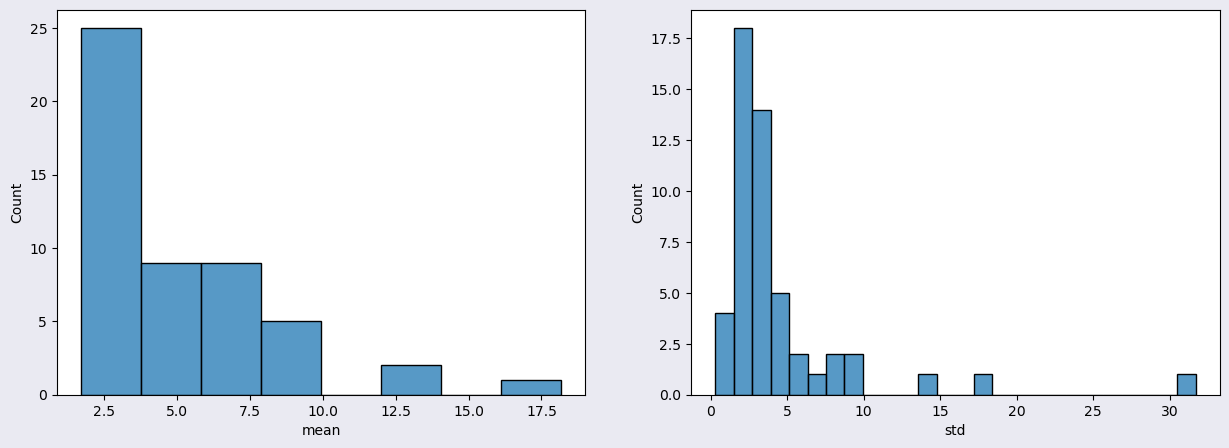

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=each_state,x='mean',ax=axes[0])
sns.histplot(data=each_state,x='std',ax=axes[1])
plt.show()

There seems to be a big difference in both the mean and the standard from state to state. There are too many outliers. Hence we will plot the distribution for microbusiness density and perform outliers detection and removal.

**Plot the distribution plots for the microbusiness_density**


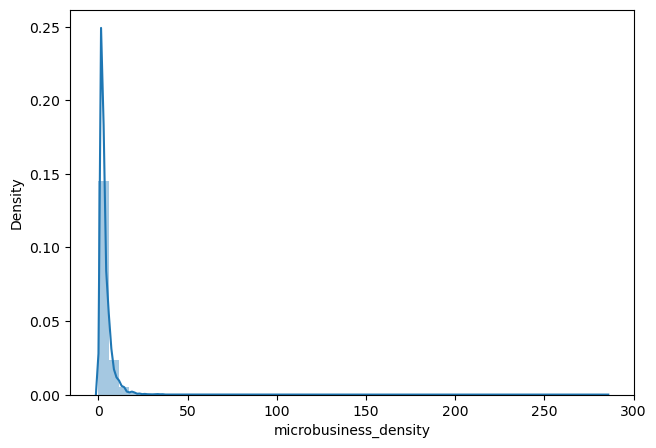

In [10]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

sns.distplot(train_df['microbusiness_density'])

plt.show()

<AxesSubplot:>

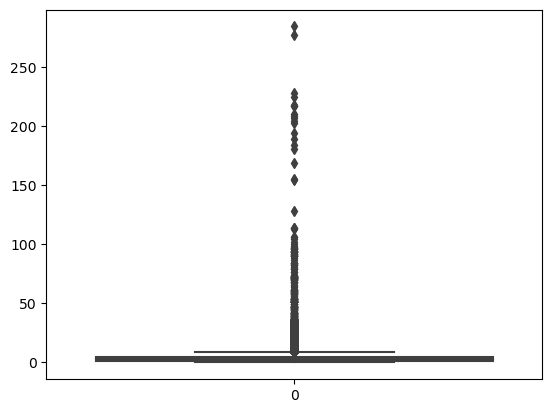

In [11]:
 # Form a box-plot for the skewed feature
sns.boxplot(train_df['microbusiness_density'])

microbusiness density data is right-skwed distribution, thereby we will use IQR-based technique to detect and remove outliers

**Removing outliers using IQR-based technique**

In [12]:
# Finding the IQR
percentile25 = train_df['microbusiness_density'].quantile(0.25)
percentile75 = train_df['microbusiness_density'].quantile(0.75)

In [13]:
iqr = percentile75 - percentile25

In [14]:
# Finding the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [15]:
train_df[train_df['microbusiness_density'] > upper_limit]
train_df[train_df['microbusiness_density'] < lower_limit]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year_month


In [16]:
new_train_df = train_df[train_df['microbusiness_density'] < upper_limit]
new_train_df.shape

(113519, 10)

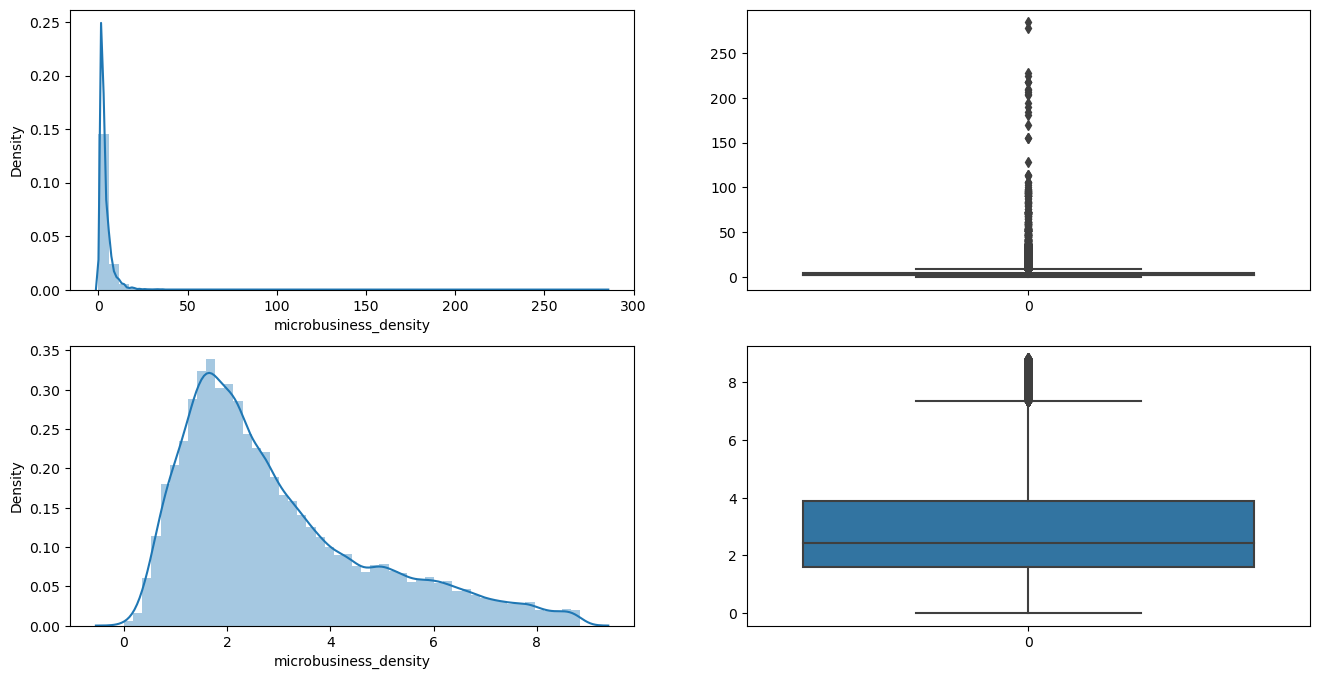

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train_df['microbusiness_density'])
plt.subplot(2,2,2)
sns.boxplot(train_df['microbusiness_density'])

plt.subplot(2,2,3)
sns.distplot(new_train_df['microbusiness_density'])
plt.subplot(2,2,4)
sns.boxplot(new_train_df['microbusiness_density'])
plt.show()

In [18]:
# Capping
new_train_df_cap = train_df.copy()

new_train_df_cap['microbusiness_density'] = np.where(
    new_train_df_cap['microbusiness_density'] > upper_limit,
    upper_limit,
    np.where(
        new_train_df_cap['microbusiness_density'] < lower_limit,
        lower_limit,
        new_train_df_cap['microbusiness_density']))

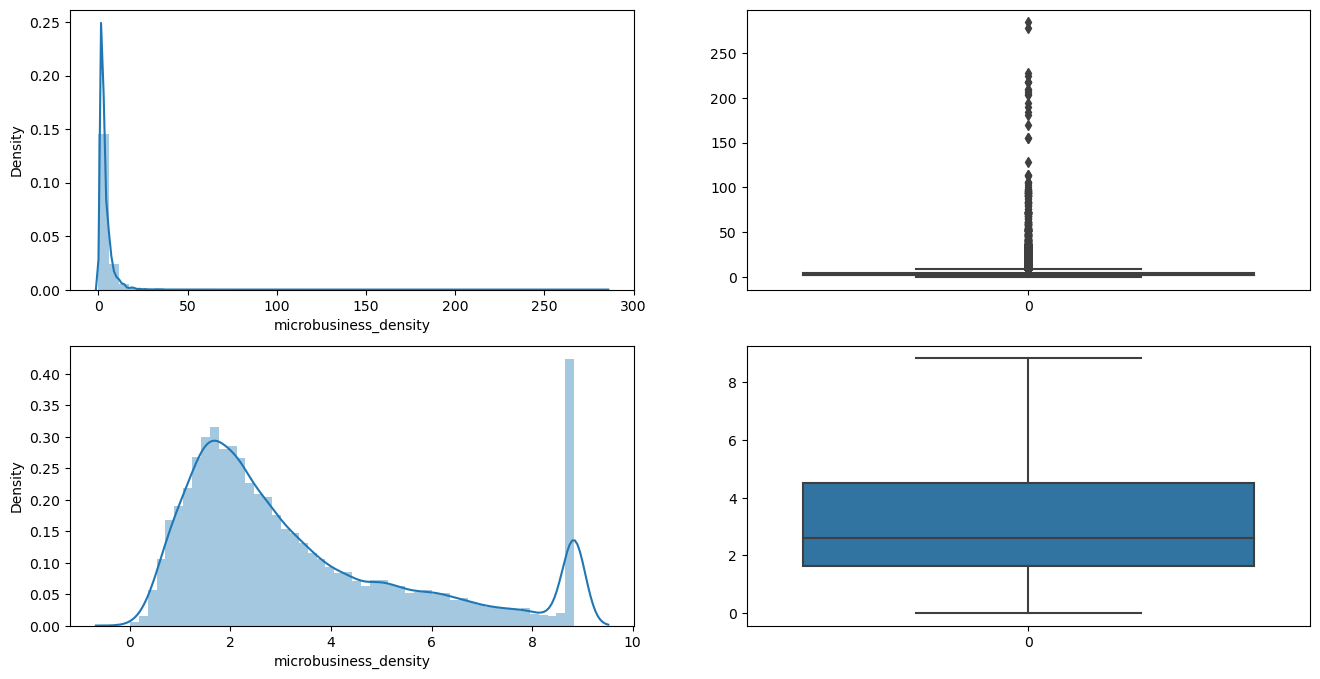

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(train_df['microbusiness_density'])
plt.subplot(2,2,2)
sns.boxplot(train_df['microbusiness_density'])

plt.subplot(2,2,3)
sns.distplot(new_train_df_cap['microbusiness_density'])
plt.subplot(2,2,4)
sns.boxplot(new_train_df_cap['microbusiness_density'])
plt.show()

In [20]:
new_train_df_cap['microbusiness_density'].describe()

count    122265.000000
mean          3.378144
std           2.349475
min           0.000000
25%           1.639344
50%           2.586543
75%           4.519231
max           8.839061
Name: microbusiness_density, dtype: float64

In [21]:
new_train_df_cap.describe()

,cfips,microbusiness_density,active,year,month
count,122265.000000,122265.000000,1.222650e+05,122265.000000,122265.000000
mean,30376.037640,3.378144,6.442858e+03,2020.692308,6.692308
std,15143.508721,2.349475,3.304001e+04,0.991089,3.390452
min,1001.000000,0.000000,0.000000e+00,2019.000000,1.000000
25%,18177.000000,1.639344,1.450000e+02,2020.000000,4.000000
50%,29173.000000,2.586543,4.880000e+02,2021.000000,7.000000
75%,45077.000000,4.519231,2.124000e+03,2022.000000,10.000000
max,56045.000000,8.839061,1.167744e+06,2022.000000,12.000000


**Check the transition from August 2019 to October 2022**

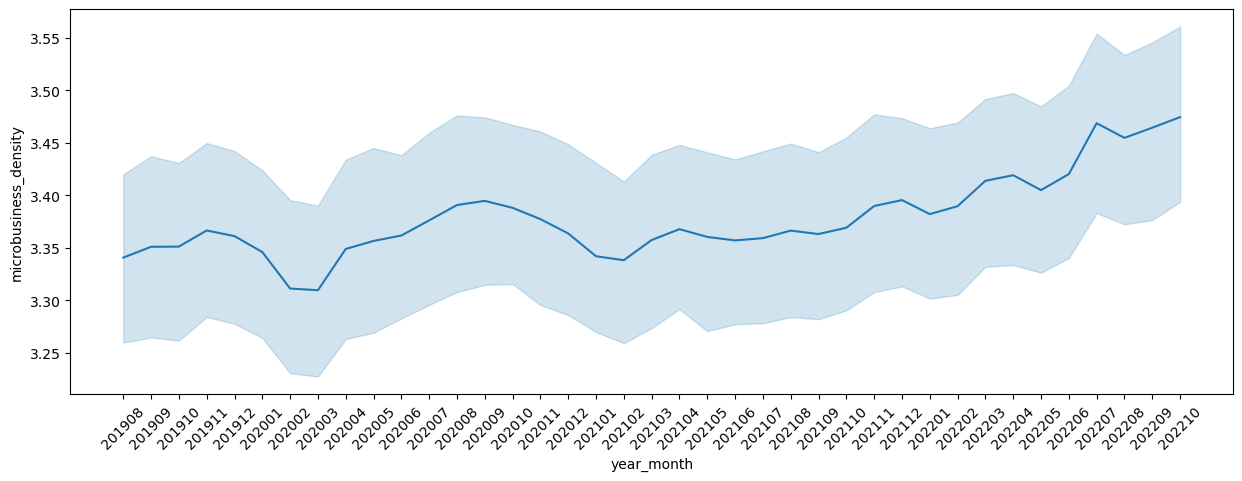

In [22]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_train_df_cap,x='year_month',y='microbusiness_density')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

gradually increasing 

**See if there are differences by state**  
**Check the statistics first**

In [23]:
sort_std=new_train_df_cap.groupby(['state']).describe()['microbusiness_density'].sort_values('count', ascending=False).index
each_state=new_train_df_cap.groupby(['state']).describe()['microbusiness_density'].sort_values('count', ascending=False)
each_state

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Texas,9906.0,3.107245,2.149373,0.000000,1.534740,2.480071,4.061792,8.839061
Georgia,6201.0,3.032164,2.406214,0.063837,1.235951,2.120914,4.023281,8.839061
Virginia,5070.0,4.035696,2.450961,0.143384,1.923466,3.714298,5.536997,8.839061
Kentucky,4680.0,2.049071,1.580226,0.224027,0.953756,1.593625,2.662017,8.839061
Missouri,4485.0,2.708835,1.912856,0.161628,1.475608,2.093136,3.000642,8.839061
Kansas,4095.0,2.422350,1.285570,0.562430,1.576070,2.148502,2.800141,8.839061
Illinois,3978.0,2.941745,2.143561,0.558458,1.581755,2.139735,3.375105,8.839061
North Carolina,3900.0,3.707310,2.332622,0.529395,1.942805,3.079854,5.145720,8.839061
Iowa,3861.0,2.793722,1.517970,0.839675,1.825221,2.396320,3.211806,8.839061


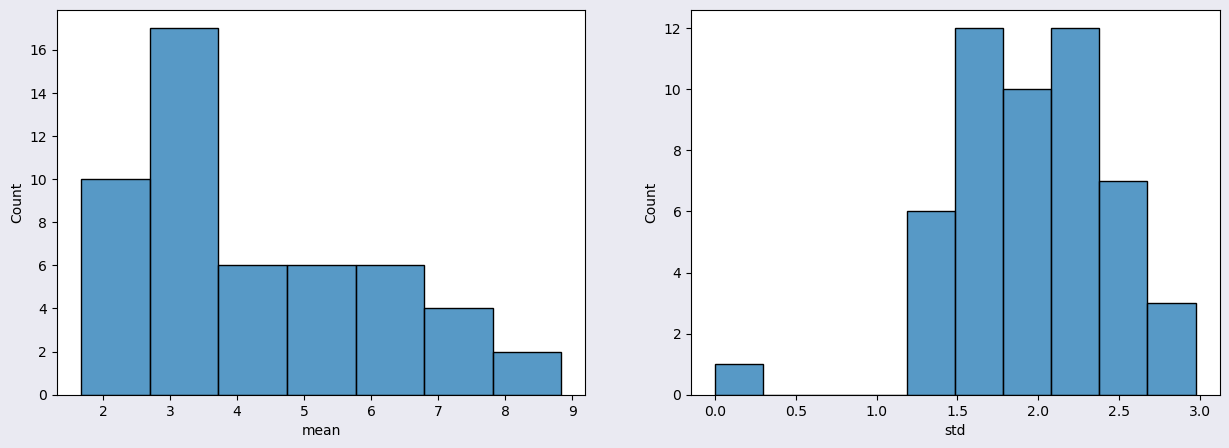

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='#EAEAF2')
sns.histplot(data=each_state,x='mean',ax=axes[0])
sns.histplot(data=each_state,x='std',ax=axes[1])
plt.show()

After detecting and removing outliers based on IQR technique, the difference in both mean and standard from state to state has been greatly narrowed.

* 'Rhode Island','West Virginia','Arkansas': 3 state that has the least std
* 'Florida','Colorado','Neveda': 3 state that has the most std

In [25]:
sort_std=new_train_df_cap.groupby(['state']).describe()['microbusiness_density'].sort_values('std', ascending=False).index
each_state=new_train_df_cap.groupby(['state']).describe()['microbusiness_density'].sort_values('std', ascending=False)
each_state

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Florida,2613.0,5.407841,2.973096,0.768377,2.228571,5.480881,8.839061,8.839061
Colorado,2496.0,5.895638,2.847589,0.550683,3.070270,6.123718,8.839061,8.839061
Nevada,663.0,4.814219,2.738100,1.106074,2.772290,4.053741,8.839061,8.839061
Utah,1131.0,6.293245,2.533809,1.927897,3.920376,6.190611,8.839061,8.839061
Wyoming,897.0,4.712305,2.513502,1.150575,2.832936,3.737043,7.284328,8.839061
California,2262.0,6.110924,2.488264,1.497465,3.738137,6.233485,8.839061,8.839061
Virginia,5070.0,4.035696,2.450961,0.143384,1.923466,3.714298,5.536997,8.839061
Idaho,1716.0,4.337149,2.443021,0.535475,2.551638,3.471531,5.325855,8.839061
Georgia,6201.0,3.032164,2.406214,0.063837,1.235951,2.120914,4.023281,8.839061


**Check the transition from August 2019 to October 2022 with 3 state that has least std**  

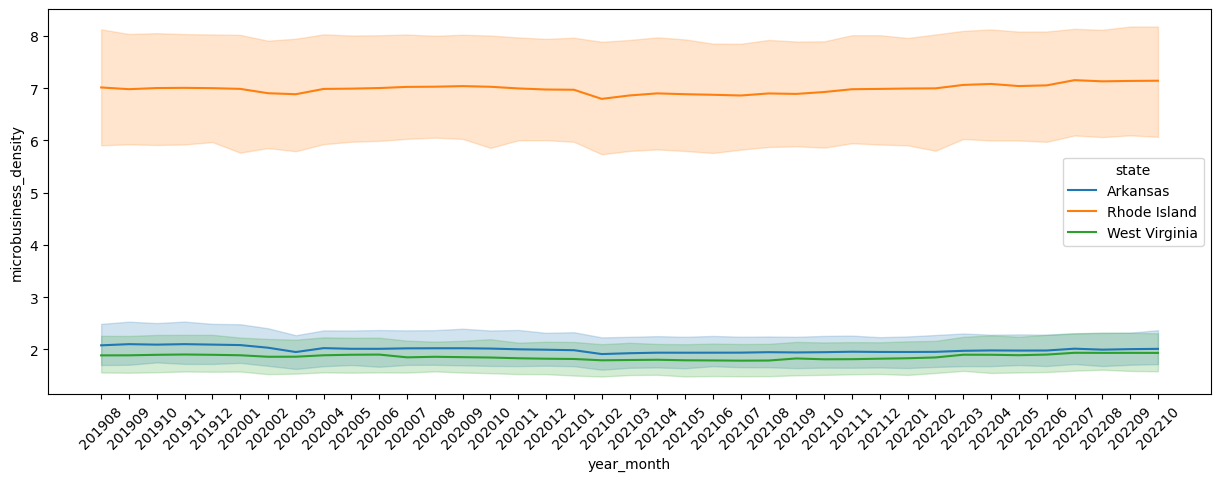

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_train_df_cap[new_train_df_cap['state'].isin(['Rhode Island','West Virginia','Arkansas'])],x='year_month',y='microbusiness_density',hue='state')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

**Check the transition from August 2019 to October 2022 with 3 state that has most std**

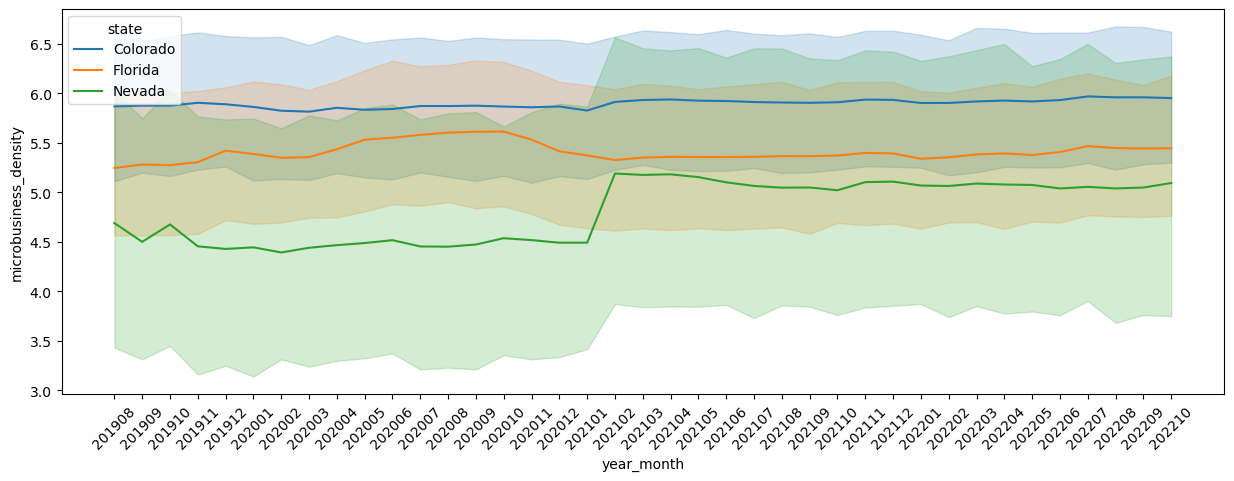

In [27]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_train_df_cap[new_train_df_cap['state'].isin(['Florida','Colorado','Nevada'])],x='year_month',y='microbusiness_density',hue='state')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

looks like Nevada has the most std in 202012 (dec'2020)

**Is it similar within the same state?**  
**Let's check it in the figure in the same way as the time series transition by state**

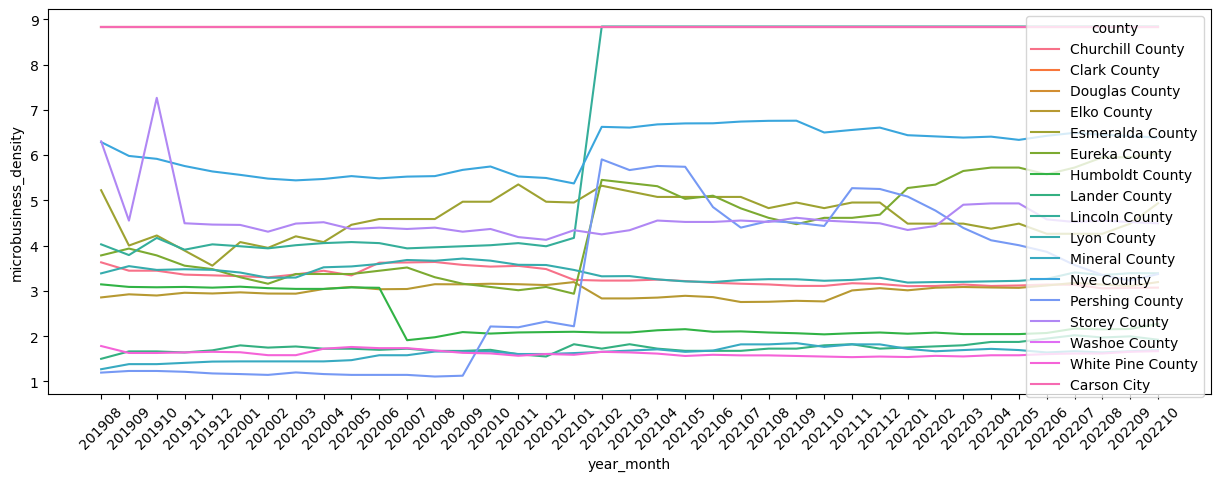

In [28]:
#plot Nevada(std=2..l..)
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_train_df_cap[new_train_df_cap['state']=='Nevada'],x='year_month',y='microbusiness_density',hue='county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

The high standard deviation state (Nevada) gives an interesting result. Not all counties fluctuate greatly, but only 2-3 counties fluctuate wildly, so when you check the overall standard deviation, it seems that it has become extremely large.

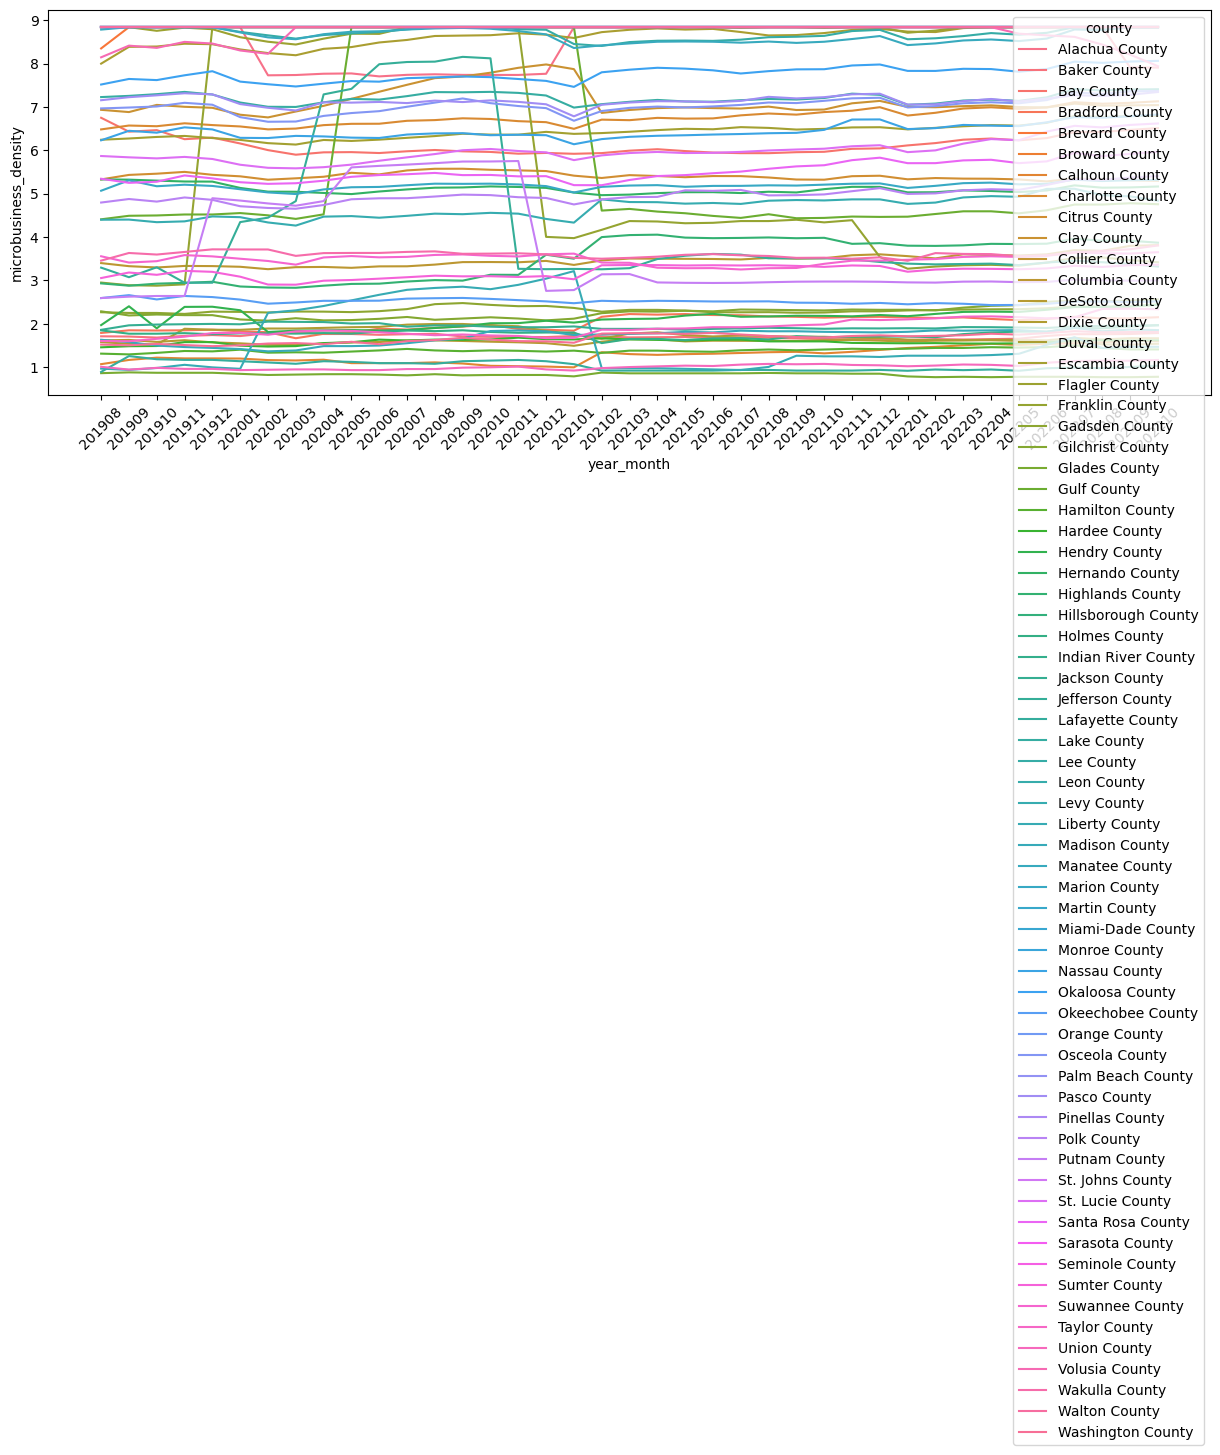

In [29]:
#plot Florida(std=2..l..)
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_train_df_cap[new_train_df_cap['state']=='Florida'],x='year_month',y='microbusiness_density',hue='county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

After removing outliers, The high standard deviation state is Florida which gives an interesting result. Not all counties fluctuate greatly, but only 2-3 counties fluctuate wildly, so when you check the overall standard deviation, it seems that it has become the largest

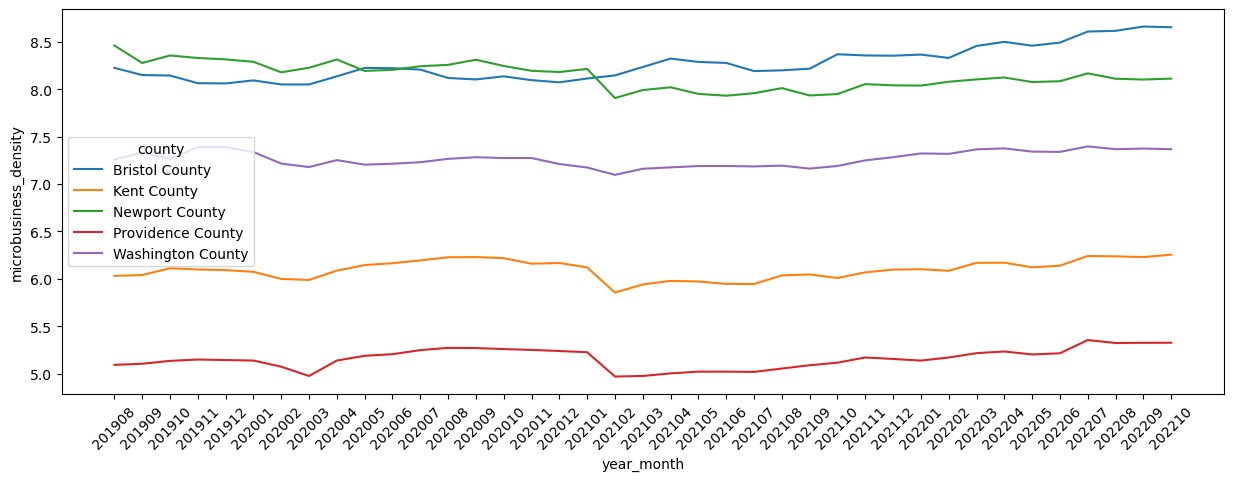

In [30]:
#plot Rhode Island(std=2..l..)
plt.figure(figsize=(15, 5))
sns.lineplot(data=new_train_df_cap[new_train_df_cap['state']=='Rhode Island'],x='year_month',y='microbusiness_density',hue='county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

In the small standard deviation state (Rhode Island), most counties show little difference, and even if there is a change, the trend is the same. (Although there are counties with slightly different trends)

THE END